In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Path to your dataset
train_path = 'dataset/train'
test_path = 'dataset/test'

# Define the desired dimensions for the resized images
new_width, new_height = 100, 100

In [3]:
# Initialize empty lists to store train images and labels
train_images = []
train_labels = []

In [4]:
# Loop through images in train folder
for image_name in os.listdir(train_path):
    image_path = os.path.join(train_path, image_name)
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image to a fixed size
    image = cv2.resize(image, (new_width, new_height))
    # Append the image and label to the lists
    train_images.append(image)
    train_labels.append(0 if 'cat' in image_name else 1)

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

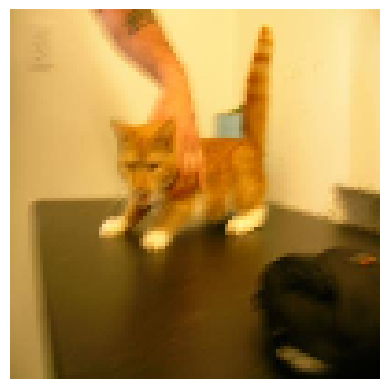

In [5]:
# Display a sample image from train set
plt.imshow(cv2.cvtColor(train_images[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [6]:
# Print the shape of the train images arrays and labels arrays
print("Train Images shape:", train_images.shape)
print("Train Labels shape:", train_labels.shape)

Train Images shape: (25000, 100, 100, 3)
Train Labels shape: (25000,)


In [7]:
# Initialize empty lists to store test images and labels
test_images = []
test_labels = []

In [8]:
# Loop through images in test folder
for image_name in os.listdir(test_path):
    image_path = os.path.join(test_path, image_name)
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image to a fixed size
    image = cv2.resize(image, (new_width, new_height))
    # Append the image and label to the lists
    test_images.append(image)
    test_labels.append(0 if 'cat' in image_name else 1)

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

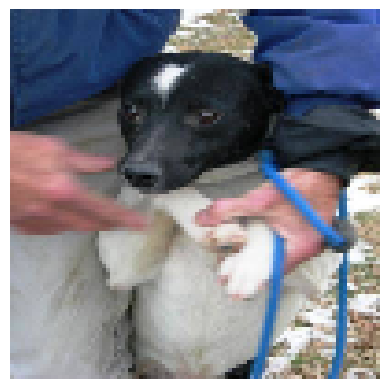

In [9]:
# Display a sample image from test set
plt.imshow(cv2.cvtColor(test_images[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
# Print the shape of the test images arrays and labels arrays
print("Test Images shape:", test_images.shape)
print("Test Labels shape:", test_labels.shape)

Test Images shape: (12500, 100, 100, 3)
Test Labels shape: (12500,)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Use a subset of the dataset with stratified split
train_images_subset, test_images_subset, train_labels_subset, test_labels_subset = train_test_split(train_images, train_labels, train_size=0.1, random_state=42, stratify=train_labels)

# Flatten the images
train_images_flat = train_images_subset.reshape(train_images_subset.shape[0], -1)
test_images_flat = test_images_subset.reshape(test_images_subset.shape[0], -1)

# Reduce dimensionality with PCA
pca = PCA(n_components=100)
train_images_pca = pca.fit_transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)

In [33]:
# Initialize LinearSVC classifier
svm = LinearSVC(dual=False, max_iter=1000)

# Train the SVM model
svm.fit(train_images_pca, train_labels_subset)

# Predict on the test images
predictions = svm.predict(test_images_pca)

In [34]:
# Calculate accuracy
accuracy = accuracy_score(test_labels_subset, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5716444444444444


In [35]:
# Print classification report
print("Classification Report:")
print(classification_report(test_labels_subset, predictions, target_names=['cat', 'dog'], zero_division=0))

Classification Report:
              precision    recall  f1-score   support

         cat       0.57      0.57      0.57     11250
         dog       0.57      0.58      0.57     11250

    accuracy                           0.57     22500
   macro avg       0.57      0.57      0.57     22500
weighted avg       0.57      0.57      0.57     22500

